In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
path = "data/Case_Information.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,case_id,age,age_group,sex,date_announced,date_recovered,date_of_death,status,date_announced_as_removed,province,muni_city,health_status,home_quarantined,date_of_onset_of_symptoms,pregnant,region
0,C404174,38.0,35 to 39,Female,2020-01-30,NaN,NaN,Recovered,2020-02-07,Negros Oriental,Dumaguete City,Recovered,NaN,2020-01-21,NaN,Central Visayas (Region VII)
1,C462688,44.0,40 to 44,Male,2020-02-03,NaN,2020-02-01,Died,2020-02-02,Negros Oriental,Dumaguete City,Died,NaN,2020-01-18,NaN,Central Visayas (Region VII)
2,C387710,60.0,60 to 64,Female,2020-02-05,2020-01-31,NaN,Recovered,2020-02-05,Bohol,Panglao,Recovered,No,2020-01-21,NaN,Central Visayas (Region VII)
3,C377460,48.0,45 to 49,Male,2020-03-06,NaN,NaN,Recovered,2020-03-27,Metropolitan Manila,Taguig,Recovered,No,2020-03-03,NaN,Metropolitan Manila
4,C498051,62.0,60 to 64,Male,2020-03-06,NaN,2020-03-11,Died,2020-03-12,Rizal,Cainta,Died,No,2020-02-25,NaN,CALABARZON (Region IV-A)


In [ ]:
df.count()

1.   What is the death rate of total cases in Canada and Philippines respectively?
2.   Since Canada and Philippines have different geographical locations and economical
development, Are there different recovery rates and death rates per age group
between Canada and Philippines?
3.   Is local transmission or import cases the main COVID-19 source in Canada and
Philippines?
4.   Based on temperature condition, to what extent does it affect the COVID-19
transmission rates or growth factors in Canada and Philippines?
5.   Similarly, both of Canada and Philipine have the issue that male is more vulnerable
than female. Why does the Philippines have greater gap than Canada?







Check Data Type for all Columns

In [ ]:
df.dtypes

case_id                       object
age                          float64
age_group                     object
sex                           object
date_announced                object
date_recovered                object
date_of_death                 object
status                        object
date_announced_as_removed     object
province                      object
muni_city                     object
health_status                 object
home_quarantined              object
date_of_onset_of_symptoms     object
pregnant                      object
region                        object
dtype: object

Change data type to correct data type

In [ ]:
df['date_announced']= pd.to_datetime(df['date_announced'])
df['date_recovered']= pd.to_datetime(df['date_recovered'])
df['date_of_death']= pd.to_datetime(df['date_of_death'])
df['date_announced_as_removed']= pd.to_datetime(df['date_announced_as_removed'])
df['date_of_onset_of_symptoms']= pd.to_datetime(df['date_of_onset_of_symptoms'])
df['case_id'] = df['case_id'].astype('category')
df['age_group'] = df['age_group'].astype('category')
df['sex'] = df['sex'].astype('category')
df['status'] = df['status'].astype('category')
df['province'] = df['province'].astype('category')
df['muni_city'] = df['muni_city'].astype('category')
df['health_status'] = df['health_status'].astype('category')
df['home_quarantined'] = df['home_quarantined'].astype('category')
df['pregnant'] = df['pregnant'].astype('category')
df['region'] = df['region'].astype('category')
df.dtypes

case_id                            category
age                                 float64
age_group                          category
sex                                category
date_announced               datetime64[ns]
date_recovered               datetime64[ns]
date_of_death                datetime64[ns]
status                             category
date_announced_as_removed    datetime64[ns]
province                           category
muni_city                          category
health_status                      category
home_quarantined                   category
date_of_onset_of_symptoms    datetime64[ns]
pregnant                           category
region                             category
dtype: object

In [ ]:
df.dtypes

case_id                            category
age                                 float64
age_group                          category
sex                                category
date_announced               datetime64[ns]
date_recovered               datetime64[ns]
date_of_death                datetime64[ns]
status                             category
date_announced_as_removed    datetime64[ns]
province                           category
muni_city                          category
health_status                      category
home_quarantined                   category
date_of_onset_of_symptoms    datetime64[ns]
pregnant                           category
region                             category
dtype: object

Check the list of all columns in dataset

In [ ]:
print(df.keys())

Index(['case_id', 'age', 'age_group', 'sex', 'date_announced',
       'date_recovered', 'date_of_death', 'status',
       'date_announced_as_removed', 'province', 'muni_city', 'health_status',
       'home_quarantined', 'date_of_onset_of_symptoms', 'pregnant', 'region'],
      dtype='object')


In [115]:
#drop NaN
hq = df[['home_quarantined']]
hq

,home_quarantined
0,NaN
1,NaN
2,No
3,No
4,No
...,...
12086,NaN
12087,NaN
12088,NaN
12089,Yes


In [116]:
hq= hq.dropna()
hq= hq.reset_index(drop=True)
hq

,home_quarantined
0,No
1,No
2,No
3,No
4,No
...,...
5305,Yes
5306,Yes
5307,Yes
5308,Yes


Drop the columns that same data, "status" and "health status"

In [ ]:
df.drop('health_status', inplace=True, axis=1)

In [ ]:
print(df.keys())

Index(['case_id', 'age', 'age_group', 'sex', 'date_announced',
       'date_recovered', 'date_of_death', 'status',
       'date_announced_as_removed', 'province', 'muni_city',
       'home_quarantined', 'date_of_onset_of_symptoms', 'pregnant', 'region'],
      dtype='object')


In [ ]:
df.head()

,case_id,age,age_group,sex,date_announced,date_recovered,date_of_death,status,date_announced_as_removed,province,muni_city,home_quarantined,date_of_onset_of_symptoms,pregnant,region
0,C404174,38.0,35 to 39,Female,2020-01-30,NaT,NaT,Recovered,2020-02-07,Negros Oriental,Dumaguete City,NaN,2020-01-21,NaN,Central Visayas (Region VII)
1,C462688,44.0,40 to 44,Male,2020-02-03,NaT,2020-02-01,Died,2020-02-02,Negros Oriental,Dumaguete City,NaN,2020-01-18,NaN,Central Visayas (Region VII)
2,C387710,60.0,60 to 64,Female,2020-02-05,2020-01-31,NaT,Recovered,2020-02-05,Bohol,Panglao,No,2020-01-21,NaN,Central Visayas (Region VII)
3,C377460,48.0,45 to 49,Male,2020-03-06,NaT,NaT,Recovered,2020-03-27,Metropolitan Manila,Taguig,No,2020-03-03,NaN,Metropolitan Manila
4,C498051,62.0,60 to 64,Male,2020-03-06,NaT,2020-03-11,Died,2020-03-12,Rizal,Cainta,No,2020-02-25,NaN,CALABARZON (Region IV-A)


# 1. The death rate of total cases in Philippines 

Select two columns : date_announced and status to do the analysis

In [ ]:
data1 = df[['date_announced', 'status']]

In [ ]:
data1

,date_announced,status
0,2020-01-30,Recovered
1,2020-02-03,Died
2,2020-02-05,Recovered
3,2020-03-06,Recovered
4,2020-03-06,Died
...,...,...
12086,2020-05-15,For validation
12087,2020-05-15,Died
12088,2020-05-15,For validation
12089,2020-05-15,Home quarantined


In [ ]:
data1.isnull().sum()

date_announced    0
status            0
dtype: int64

In [ ]:
data1[data1.status == 'Died'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,date_announced,status
count,806,806
unique,70,1
top,2020-03-31 00:00:00,Died
freq,89,806
first,2020-02-03 00:00:00,NaN
last,2020-05-15 00:00:00,NaN


Count "Died" data from status columns

In [ ]:
status_died = data1[data1.status == 'Died'].count()
status_died

date_announced    806
status            806
dtype: int64

In [ ]:
df.status.unique()

['Recovered', 'Died', 'Admitted', 'Home quarantined', 'For validation']
Categories (5, object): ['Recovered', 'Died', 'Admitted', 'Home quarantined', 'For validation']

Count other data except "Died" from status columns

In [ ]:
data1[data1.status == 'Recovered'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,date_announced,status
count,2460,2460
unique,65,1
top,2020-03-31 00:00:00,Recovered
freq,254,2460
first,2020-01-30 00:00:00,NaN
last,2020-05-14 00:00:00,NaN


In [ ]:
status_recovered = data1[data1.status == 'Recovered'].count()
status_recovered

date_announced    2460
status            2460
dtype: int64

In [ ]:
data1[data1.status == 'Admitted'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,date_announced,status
count,1772,1772
unique,60,1
top,2020-03-31 00:00:00,Admitted
freq,111,1772
first,2020-03-11 00:00:00,NaN
last,2020-05-15 00:00:00,NaN


In [ ]:
status_admitted = data1[data1.status == 'Admitted'].count()
status_admitted

date_announced    1772
status            1772
dtype: int64

In [ ]:
data1[data1.status == 'Home quarantined'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,date_announced,status
count,1263,1263
unique,58,1
top,2020-04-13 00:00:00,Home quarantined
freq,72,1263
first,2020-03-17 00:00:00,NaN
last,2020-05-15 00:00:00,NaN


In [ ]:
status_homeq = data1[data1.status == 'Home quarantined'].count()
status_homeq

date_announced    1263
status            1263
dtype: int64

In [ ]:
data1[data1.status == 'For validation'].describe()

NameError: ignored

In [ ]:
status_validation = data1[data1.status == 'For validation'].count()
status_validation

date_announced    5790
status            5790
dtype: int64

In [ ]:
total = status_died + status_admitted + status_homeq + status_recovered + status_validation
died_percentage = round((status_died / total)*100)
died_percentage


date_announced    7.0
status            7.0
dtype: float64

In [ ]:
total

date_announced    12091
status            12091
dtype: int64

Using pie chart to calculate the percentage of Died and total recorded cases

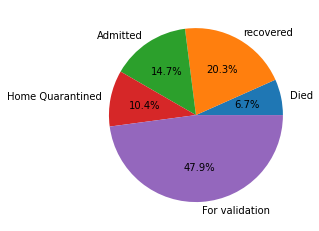

In [ ]:
status_died, status_recovered, status_admitted, status_homeq, status_validation = 806, 2460, 1772, 1263, 5790
fiq, ax = plt.subplots()
ax.pie((status_died, status_recovered, status_admitted, status_homeq, status_validation), labels=('Died','recovered','Admitted','Home Quarantined','For validation'), autopct='%1.1f%%')
plt.show()

# Patient Status accoring to the Month

Extract month from status columns

In [ ]:
data1['month'] = pd.DatetimeIndex(data1['date_announced']).month
data1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date_announced,status,month
0,2020-01-30,Recovered,1
1,2020-02-03,Died,2
2,2020-02-05,Recovered,2
3,2020-03-06,Recovered,3
4,2020-03-06,Died,3
...,...,...,...
12086,2020-05-15,For validation,5
12087,2020-05-15,Died,5
12088,2020-05-15,For validation,5
12089,2020-05-15,Home quarantined,5


In [ ]:
data1_test = data1.groupby(["month", "status"])["date_announced"].size()
data1_test

month  status          
1      Admitted               0
       Died                   0
       For validation         0
       Home quarantined       0
       Recovered              1
2      Admitted               0
       Died                   1
       For validation         0
       Home quarantined       0
       Recovered              1
3      Admitted             349
       Died                 340
       For validation       120
       Home quarantined     108
       Recovered           1164
4      Admitted            1115
       Died                 399
       For validation      2674
       Home quarantined     942
       Recovered           1274
5      Admitted             308
       Died                  66
       For validation      2996
       Home quarantined     213
       Recovered             20
Name: date_announced, dtype: int64

In [ ]:
data1_test1 = data1_test.unstack()
data1_test1

status,Admitted,Died,For validation,Home quarantined,Recovered
month,,,,,
1,0,0,0,0,1
2,0,1,0,0,1
3,349,340,120,108,1164
4,1115,399,2674,942,1274
5,308,66,2996,213,20


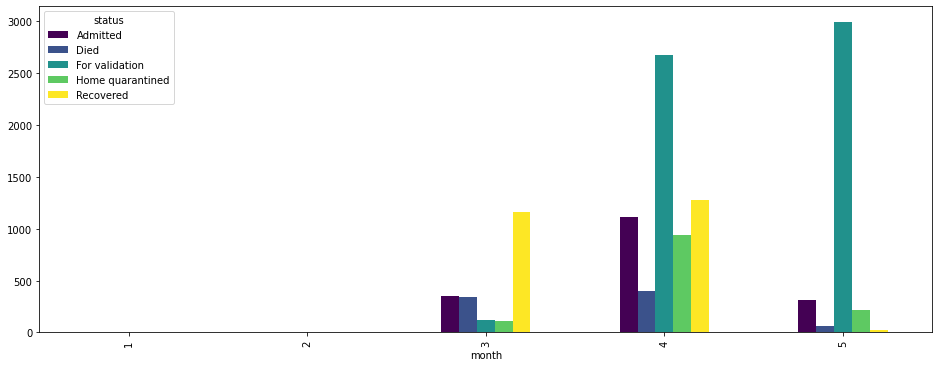

In [ ]:
data1_test1.plot(kind='bar', title="", figsize=[16,6], colormap='viridis')

# 2. The different recovery rates and death rates per age group in Philippines?

In [100]:
df['status'].describe()

count              12091
unique                 5
top       For validation
freq                5790
Name: status, dtype: object

In [101]:
data7 = df[['age_group','age','status']]
data7

,age_group,age,status
0,35 to 39,38.0,Recovered
1,40 to 44,44.0,Died
2,60 to 64,60.0,Recovered
3,45 to 49,48.0,Recovered
4,60 to 64,62.0,Died
...,...,...,...
12086,35 to 39,35.0,For validation
12087,35 to 39,37.0,Died
12088,60 to 64,62.0,For validation
12089,15 to 19,18.0,Home quarantined


Drop rows in the new data frame that have the Nan values

In [102]:
data7= data7.dropna()
data7= data7.reset_index(drop=True)
data7

,age_group,age,status
0,35 to 39,38.0,Recovered
1,40 to 44,44.0,Died
2,60 to 64,60.0,Recovered
3,45 to 49,48.0,Recovered
4,60 to 64,62.0,Died
...,...,...,...
12065,35 to 39,35.0,For validation
12066,35 to 39,37.0,Died
12067,60 to 64,62.0,For validation
12068,15 to 19,18.0,Home quarantined


Group the data according to the age group and the patient status

In [103]:
data7_count = data7.groupby(["age_group"])["status"].value_counts()
data7_count

age_group  status          
0 to 4     For validation      100
           Admitted             22
           Recovered            14
           Home quarantined     11
           Died                  7
                              ... 
80+        Died                108
           For validation       90
           Admitted             72
           Recovered            37
           Home quarantined     14
Name: status, Length: 85, dtype: int64

In [104]:
 data7_count= data7.groupby("age_group")["status"].count()
 data7_count

age_group
0 to 4       154
10 to 14     169
15 to 19     282
20 to 24     767
25 to 29    1289
30 to 34    1510
35 to 39    1061
40 to 44     967
45 to 49    1002
5 to 9       122
50 to 54     973
55 to 59     967
60 to 64     921
65 to 69     713
70 to 74     565
75 to 79     287
80+          321
Name: status, dtype: int64

Use unstack function to separate the unique data from status column into 5 differents new column. The data in the new columns is a value accumulate from each of the age_group column. Then, add 3 more additional columns which are total, Died_percent, and Recovered_percent. The formula has been added into the code for calculating the Died percentange and Recovered percentage for each age group.

In [105]:
data7_status = data2.groupby('age_group')['status'].value_counts().unstack().fillna(0)
data7_status.rename(columns = {'Home quarantined':'home_quarantined'}, inplace = True)
data7_status.rename(columns = {'For validation':'for_validation'}, inplace = True)
data7_status['total'] = data7_status.apply(lambda row: row.Admitted + row.Died + row.for_validation + row.home_quarantined + row.Recovered, axis=1)
data7_status['Died_percentage'] = data7_status.apply(lambda row: row.Died/ row.total * 100, axis=1)
data7_status['Recovered_percentage'] = data7_status.apply(lambda row: row.Recovered/ row.total * 100, axis=1)
data7_status = data7_status.round(2)
data7_status

status,Admitted,Died,for_validation,home_quarantined,Recovered,total,Died_percentage,Recovered_percentage
age_group,,,,,,,,
0 to 4,22,7,100,11,14,154,4.55,9.09
10 to 14,8,1,142,11,7,169,0.59,4.14
15 to 19,25,4,228,15,10,282,1.42,3.55
20 to 24,97,3,451,90,126,767,0.39,16.43
25 to 29,140,6,718,184,241,1289,0.47,18.70
30 to 34,185,11,745,230,339,1510,0.73,22.45
35 to 39,129,20,563,130,219,1061,1.89,20.64
40 to 44,128,30,506,114,189,967,3.10,19.54
45 to 49,151,38,483,103,227,1002,3.79,22.65


In [106]:
data7_status.dtypes

status
Admitted                  int64
Died                      int64
for_validation            int64
home_quarantined          int64
Recovered                 int64
total                     int64
Died_percentage         float64
Recovered_percentage    float64
dtype: object

Finding the maximum number of Died Cases bases on each age group

Plotting the graph based on Died percentage corresponding with the age group

In [ ]:
print("Died_percentage")

Died_percentage


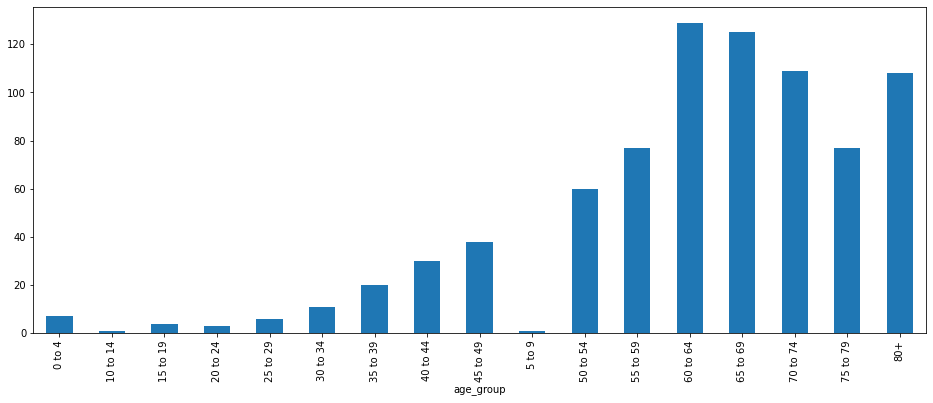

In [133]:
data2_status.plot(kind='bar', y='Died_percentage', figsize=[16,6])

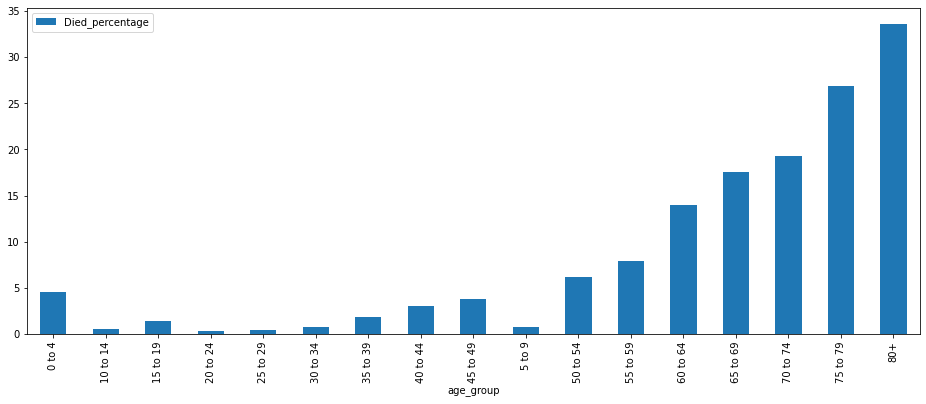

In [108]:
data7_status.plot(kind='bar', y='Died_percentage', figsize=[16,6])

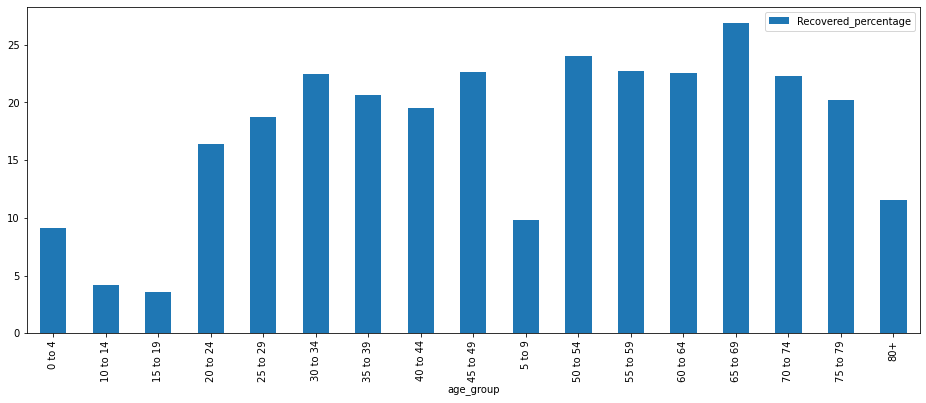

In [109]:
data7_status.plot(kind='bar', y='Recovered_percentage', figsize=[16,6])

Death Rate between Gender

In [117]:
sex = df[['sex', 'status']]
sex

,sex,status
0,Female,Recovered
1,Male,Died
2,Female,Recovered
3,Male,Recovered
4,Male,Died
...,...,...
12086,Male,For validation
12087,Male,Died
12088,Female,For validation
12089,Female,Home quarantined


In [118]:
sex.describe()

,sex,status
count,12091,12091
unique,2,5
top,Male,For validation
freq,6521,5790


In [119]:
sex_count = sex.groupby(["sex"])["status"].value_counts()
sex_count

sex     status          
Female  For validation      2645
        Recovered           1131
        Admitted             842
        Home quarantined     669
        Died                 283
Male    For validation      3145
        Recovered           1329
        Admitted             930
        Home quarantined     594
        Died                 523
Name: status, dtype: int64

In [120]:
sex_ge= sex.groupby("sex")["status"].count()
sex_ge

sex
Female    5570
Male      6521
Name: status, dtype: int64

In [121]:
sex_status = sex.groupby('sex')['status'].value_counts().unstack().fillna(0)
sex_status.rename(columns = {'Home quarantined':'home_quarantined'}, inplace = True)
sex_status.rename(columns = {'For validation':'for_validation'}, inplace = True)
sex_status['total'] = sex_status.apply(lambda row: row.Admitted + row.Died + row.for_validation + row.home_quarantined + row.Recovered, axis=1)
sex_status['Died_percent'] = sex_status.apply(lambda row: row.Died/ row.total * 100, axis=1)
sex_status

status,Admitted,Died,for_validation,home_quarantined,Recovered,total,Died_percent
sex,,,,,,,
Female,842,283,2645,669,1131,5570,5.080790
Male,930,523,3145,594,1329,6521,8.020242


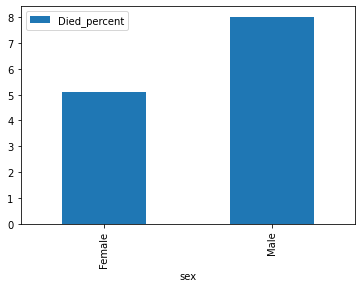

In [122]:
sex_status.plot.bar(y='Died_percent')

# 4. Which province in the Philippine that led to increase number of cases

Select case_id and province column for this analysis into new data frame. Drop any rows that maybe containt NaN value. Count the number cases accorinding to the province

In [ ]:
df['province'].describe()

count                   11053
unique                     61
top       Metropolitan Manila
freq                     6873
Name: province, dtype: object

In [ ]:
data4 = df[["case_id","province"]]
data4 = data4.dropna()
data4 = data4.reset_index(drop=True)
data4['count'] = data4.groupby("province").transform('count')
data4.drop('case_id', inplace=True, axis=1)
data4 = data4.drop_duplicates()
data4

,province,count
0,Negros Oriental,7
2,Bohol,1
3,Metropolitan Manila,6873
4,Rizal,417
12,Bulacan,141
...,...,...
7038,Ifugao,2
8321,Sulu,1
8783,Guimaras,2
9289,Davao Occidental,1


Finding the highest cases in province

In [ ]:
province_max = data4.max()
province_max

province    Zamboanga del Sur
count                    6873
dtype: object

In [ ]:
# Finding the lowest cases
province_min = data4.min()
province_min

province    Abra
count          1
dtype: object

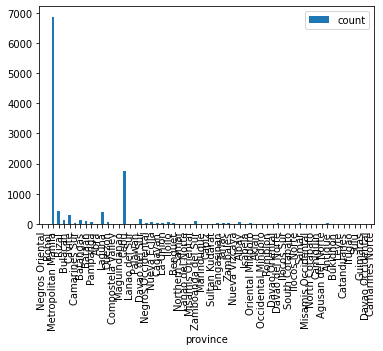

In [ ]:
data4.plot(x='province', y='count', kind ='bar')
plt.show()

In [124]:
# Most Cases recorded by region
region = df[["case_id", "region"]]
region = region.dropna()
region = region.reset_index(drop=True)
region['count'] = region.groupby("region").transform('count')
region.drop('case_id', inplace=True, axis=1)
region = region.drop_duplicates()
region

,region,count
0,Central Visayas (Region VII),1750
3,Metropolitan Manila,6873
4,CALABARZON (Region IV-A),1327
12,Central Luzon (Region III),401
24,Bicol Region (Region V),59
64,Cordillera Administrative Region (CAR),45
124,Davao Region (Region XI),191
151,Autonomous Region of Muslim Mindanao (ARMM),17
231,MIMAROPA (Region IV-B),35
245,Western Visayas (Region VI),102


In [127]:
fig = px.bar(region[['region', 'count']].sort_values('count', ascending=False), y="count", x="region", color='region', log_y=True, template='ggplot2', title='Location of  Coronavirus')
fig.show()

In [128]:
remax = region.max()
remax

count    6873
dtype: int64

In [129]:
remin = region.min()
remin

count    3
dtype: int64

Finding the highest cases in City of Philippines




In [131]:
city = df[["case_id", "muni_city"]]
city = city.dropna()
city = city.reset_index(drop=True)
city['count'] = city.groupby("muni_city").transform('count')
city.drop('case_id', inplace=True, axis=1)
city = city.drop_duplicates()
city

,muni_city,count
0,Dumaguete City,3
2,Panglao,1
3,Taguig,352
4,Cainta,99
6,Makati City,537
...,...,...
10840,Valladolid,1
10906,Bago City,1
10955,Hinigaran,1
10959,Minalabac,1


In [132]:
fig2 = px.bar(city[['muni_city', 'count']].sort_values('count', ascending=False), y="count", x="muni_city", color='muni_city', log_y=True, template='ggplot2', title='Location of  Coronavirus')
fig2.show()

# 5. which gender contribute the most cases in Philippines

In [ ]:
df['sex'].describe()

count     12091
unique        2
top        Male
freq       6521
Name: sex, dtype: object

In [ ]:
data5 = df[['sex']]
data5

,sex
0,Female
1,Male
2,Female
3,Male
4,Male
...,...
12086,Male
12087,Male
12088,Female
12089,Female


In [ ]:
data5[data5.sex == 'Male'].describe()

,sex
count,6521
unique,1
top,Male
freq,6521


Total - Male = Female
12091 - 6521 = 5570

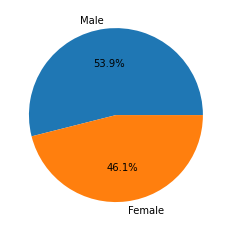

In [114]:
Male, Female = 6521, 5570
fig, ax = plt.subplots()
ax.pie((Male, Female), labels=('Male', 'Female'), autopct='%1.1f%%')
plt.show()

# K-Means

In [ ]:
data6 = df.copy()
data6.head()

,case_id,age,age_group,sex,date_announced,date_recovered,date_of_death,status,date_announced_as_removed,province,muni_city,health_status,home_quarantined,date_of_onset_of_symptoms,pregnant,region
0,C404174,38.0,35 to 39,Female,2020-01-30,NaT,NaT,Recovered,2020-02-07,Negros Oriental,Dumaguete City,Recovered,NaN,2020-01-21,NaN,Central Visayas (Region VII)
1,C462688,44.0,40 to 44,Male,2020-02-03,NaT,2020-02-01,Died,2020-02-02,Negros Oriental,Dumaguete City,Died,NaN,2020-01-18,NaN,Central Visayas (Region VII)
2,C387710,60.0,60 to 64,Female,2020-02-05,2020-01-31,NaT,Recovered,2020-02-05,Bohol,Panglao,Recovered,No,2020-01-21,NaN,Central Visayas (Region VII)
3,C377460,48.0,45 to 49,Male,2020-03-06,NaT,NaT,Recovered,2020-03-27,Metropolitan Manila,Taguig,Recovered,No,2020-03-03,NaN,Metropolitan Manila
4,C498051,62.0,60 to 64,Male,2020-03-06,NaT,2020-03-11,Died,2020-03-12,Rizal,Cainta,Died,No,2020-02-25,NaN,CALABARZON (Region IV-A)


In [ ]:
#drop Case_id data
data6.drop(['case_id'], axis=1, inplace= True)
data6.head()

,age,age_group,sex,date_announced,date_recovered,date_of_death,status,date_announced_as_removed,province,muni_city,health_status,home_quarantined,date_of_onset_of_symptoms,pregnant,region
0,38.0,35 to 39,Female,2020-01-30,NaT,NaT,Recovered,2020-02-07,Negros Oriental,Dumaguete City,Recovered,NaN,2020-01-21,NaN,Central Visayas (Region VII)
1,44.0,40 to 44,Male,2020-02-03,NaT,2020-02-01,Died,2020-02-02,Negros Oriental,Dumaguete City,Died,NaN,2020-01-18,NaN,Central Visayas (Region VII)
2,60.0,60 to 64,Female,2020-02-05,2020-01-31,NaT,Recovered,2020-02-05,Bohol,Panglao,Recovered,No,2020-01-21,NaN,Central Visayas (Region VII)
3,48.0,45 to 49,Male,2020-03-06,NaT,NaT,Recovered,2020-03-27,Metropolitan Manila,Taguig,Recovered,No,2020-03-03,NaN,Metropolitan Manila
4,62.0,60 to 64,Male,2020-03-06,NaT,2020-03-11,Died,2020-03-12,Rizal,Cainta,Died,No,2020-02-25,NaN,CALABARZON (Region IV-A)


In [ ]:
data6['home_quarantined'].value_counts()

Yes    3400
No     1910
Name: home_quarantined, dtype: int64

In [ ]:
data6['status'].value_counts()

For validation      5790
Recovered           2460
Admitted            1772
Home quarantined    1263
Died                 806
Name: status, dtype: int64

In [ ]:
data6['age_group'].value_counts()

30 to 34    1510
25 to 29    1289
35 to 39    1061
45 to 49    1002
50 to 54     973
55 to 59     967
40 to 44     967
60 to 64     921
20 to 24     767
65 to 69     713
70 to 74     565
80+          321
75 to 79     287
15 to 19     282
10 to 14     169
0 to 4       154
5 to 9       122
Name: age_group, dtype: int64

In [ ]:
data6xStatus = data6.drop(['status'], axis = 1)
data6xStatus.head()

,age,age_group,sex,date_announced,date_recovered,date_of_death,date_announced_as_removed,province,muni_city,health_status,home_quarantined,date_of_onset_of_symptoms,pregnant,region
0,38.0,35 to 39,Female,2020-01-30,NaT,NaT,2020-02-07,Negros Oriental,Dumaguete City,Recovered,NaN,2020-01-21,NaN,Central Visayas (Region VII)
1,44.0,40 to 44,Male,2020-02-03,NaT,2020-02-01,2020-02-02,Negros Oriental,Dumaguete City,Died,NaN,2020-01-18,NaN,Central Visayas (Region VII)
2,60.0,60 to 64,Female,2020-02-05,2020-01-31,NaT,2020-02-05,Bohol,Panglao,Recovered,No,2020-01-21,NaN,Central Visayas (Region VII)
3,48.0,45 to 49,Male,2020-03-06,NaT,NaT,2020-03-27,Metropolitan Manila,Taguig,Recovered,No,2020-03-03,NaN,Metropolitan Manila
4,62.0,60 to 64,Male,2020-03-06,NaT,2020-03-11,2020-03-12,Rizal,Cainta,Died,No,2020-02-25,NaN,CALABARZON (Region IV-A)


In [ ]:
data6xStatus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12091 entries, 0 to 12090
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   age                        12070 non-null  float64       
 1   age_group                  12070 non-null  category      
 2   sex                        12091 non-null  object        
 3   date_announced             12091 non-null  datetime64[ns]
 4   date_recovered             1237 non-null   datetime64[ns]
 5   date_of_death              657 non-null    datetime64[ns]
 6   date_announced_as_removed  3266 non-null   datetime64[ns]
 7   province                   11053 non-null  category      
 8   muni_city                  11053 non-null  category      
 9   health_status              12091 non-null  category      
 10  home_quarantined           5310 non-null   category      
 11  date_of_onset_of_symptoms  6561 non-null   datetime64[ns]
 12  preg

In [ ]:
df['sex'] = df['sex'].astype('category')
df['health_status'] = df['health_status'].astype('object')

In [ ]:
sex = {'Female': 1, 'Male':0}
data6xStatus.sex = [sex[item] for item in data6xStatus.sex]

In [ ]:
health_status = {'Admitted': 0, 'Died': 1, 'For validation': 2, 'Home quarantined': 3, 'Recovered': 4}
data6xStatus.health_status = [health_status[item] for item in data6xStatus.health_status]

KeyError: ignored

In [ ]:
data6xStatus.head()

,age,age_group,sex,date_announced,date_recovered,date_of_death,date_announced_as_removed,province,muni_city,health_status,home_quarantined,date_of_onset_of_symptoms,pregnant,region
0,38.0,35 to 39,1,2020-01-30,NaT,NaT,2020-02-07,Negros Oriental,Dumaguete City,Recovered,NaN,2020-01-21,NaN,Central Visayas (Region VII)
1,44.0,40 to 44,0,2020-02-03,NaT,2020-02-01,2020-02-02,Negros Oriental,Dumaguete City,Died,NaN,2020-01-18,NaN,Central Visayas (Region VII)
2,60.0,60 to 64,1,2020-02-05,2020-01-31,NaT,2020-02-05,Bohol,Panglao,Recovered,No,2020-01-21,NaN,Central Visayas (Region VII)
3,48.0,45 to 49,0,2020-03-06,NaT,NaT,2020-03-27,Metropolitan Manila,Taguig,Recovered,No,2020-03-03,NaN,Metropolitan Manila
4,62.0,60 to 64,0,2020-03-06,NaT,2020-03-11,2020-03-12,Rizal,Cainta,Died,No,2020-02-25,NaN,CALABARZON (Region IV-A)


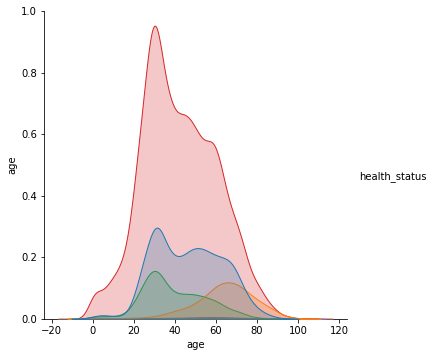

In [ ]:
sns.pairplot(df.loc[:,['age','sex','health_status']], hue = "health_status", height =5)
plt.show()

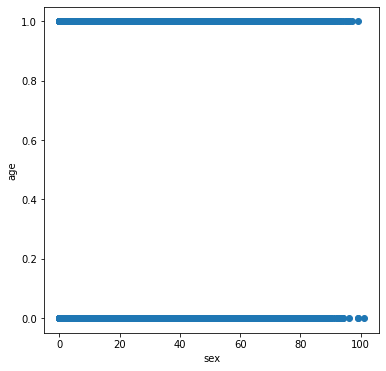

In [ ]:
# The data look without health status
plt.figure(figsize= (6,6))
plt.scatter(data6xStatus['age'], data6xStatus['sex'])
plt.xlabel('sex')
plt.ylabel('age')
plt.show()